In [1]:
from src.classifier.visualize_classifier_results import find_classify_checkpoint
%cd ..
pd_old_new = find_classify_checkpoint()

C:\mywork\python\MachineVisionExperiments\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-08 10:35:29,924	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-04-08 10:35:30,304	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


C:\mywork\python\MachineVisionExperiments
Logging to C:\mywork\python\MachineVisionExperiments\log\application_26856.log
2025-04-08 10:35:34,161 - INFO - [visualize_classifier_results.py:find_classify_checkpoint] Tuning C:\mywork\python\MachineVisionExperiments\checkpoints\tune_classifier\20250406T160738_-7795312826691345751_1 has vloss 1.023886799812317
2025-04-08 10:35:34,161 - INFO - [visualize_classifier_results.py:find_classify_checkpoint] checkpoint_000008
2025-04-08 10:35:34,161 - INFO - [visualize_classifier_results.py:find_classify_checkpoint] Parameters: {'batch_size': 250, 'cnn_layers': 4.452684373203831, 'fcn_layers': 7.0, 'final_channels': 207.0, 'learning_rate': 8.220197071239987e-05, 'starting_channels': 18.512341515610505}
2025-04-08 10:35:35,505 - INFO - [classifier.py:__init__] Classifier channel upscale ratio: 2.2571787177370006
2025-04-08 10:35:35,506 - INFO - [classifier.py:__init__] Layers = 4, downsampled_sizes = [16, 8, 4, 2], channels = [3, 18, 41, 92, 207]
202

In [2]:
efficiency = 1 / (pd_old_new.v_loss * pd_old_new.total_params)


Let's calculate the efficiency based on the number of parameters.

In [3]:
efficiency = 1 / (pd.v_loss * pd.total_params)

In [5]:
efficiency

0     1.349956e-06
1     8.533539e-07
2     1.208131e-06
3     1.515734e-06
4     9.256338e-07
          ...     
58    1.404580e-06
59    6.882849e-07
60    7.241992e-07
61    1.095880e-06
62    2.178960e-06
Length: 63, dtype: float64

In [3]:
pd_old_new.insert(8,'efficiency',efficiency)

In [4]:
pd_old_new

,batch_size,cnn_layers,fcn_layers,final_channels,learning_rate,starting_channels,v_loss,total_params,efficiency,checkpoint_path
0,250.0,4,7,207,0.000082,18,1.023887,723483,1.349956e-06,C:\mywork\python\MachineVisionExperiments\chec...
1,250.0,4,6,338,0.000414,24,0.772549,1516858,8.533539e-07,C:\mywork\python\MachineVisionExperiments\chec...
2,100.0,4,7,159,0.000010,33,1.584668,522333,1.208131e-06,C:\mywork\python\MachineVisionExperiments\chec...
3,250.0,6,5,255,0.002300,32,0.566755,1164077,1.515734e-06,C:\mywork\python\MachineVisionExperiments\chec...
4,125.0,7,4,364,0.000850,22,0.570501,1893671,9.256338e-07,C:\mywork\python\MachineVisionExperiments\chec...
...,...,...,...,...,...,...,...,...,...,...
205,125.0,6,4,216,0.001000,48,0.669635,931694,1.602834e-06,C:\mywork\python\MachineVisionExperiments\chec...
206,125.0,6,4,218,0.001000,48,0.651526,944151,1.625649e-06,C:\mywork\python\MachineVisionExperiments\chec...
207,225.0,6,4,220,0.001000,48,0.564245,956909,1.852089e-06,C:\mywork\python\MachineVisionExperiments\chec...
208,100.0,6,4,212,0.001000,48,0.655253,907512,1.681661e-06,C:\mywork\python\MachineVisionExperiments\chec...


In [6]:
new_filter = pd_old_new.checkpoint_path.map(lambda x : f'{x}').str.contains('4_2025')
new_results = pd_old_new.loc[new_filter]
old_results = pd_old_new.loc[~new_filter]

<Axes: xlabel='learning_rate', ylabel='efficiency'>

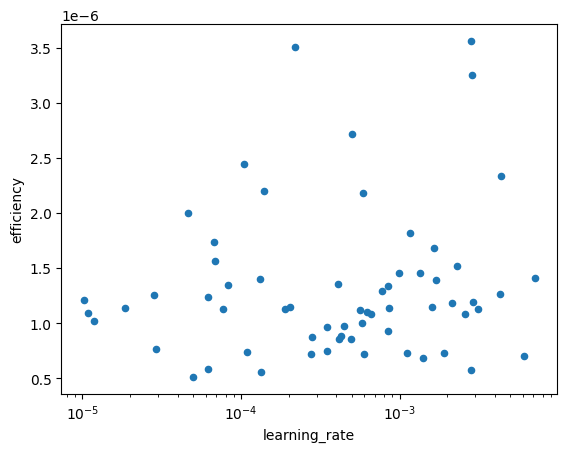

In [7]:
old_results.plot(x='learning_rate',y='efficiency',logx=True, kind='scatter')

<Axes: xlabel='learning_rate', ylabel='efficiency'>

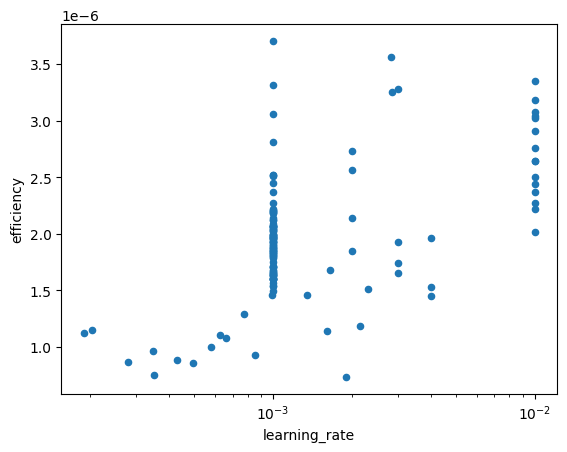

In [7]:
median_vloss = pd.v_loss.median()
lower_loss = pd[pd.v_loss < median_vloss]
lower_loss.plot(x='learning_rate',y='efficiency',logx=True, kind='scatter')

<Axes: xlabel='final_channels', ylabel='efficiency'>

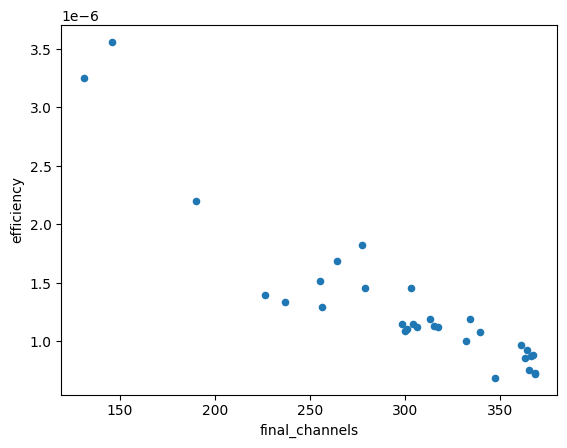

In [13]:
lower_loss.plot(x='final_channels',y='efficiency', kind='scatter')

<Axes: xlabel='final_channels', ylabel='v_loss'>

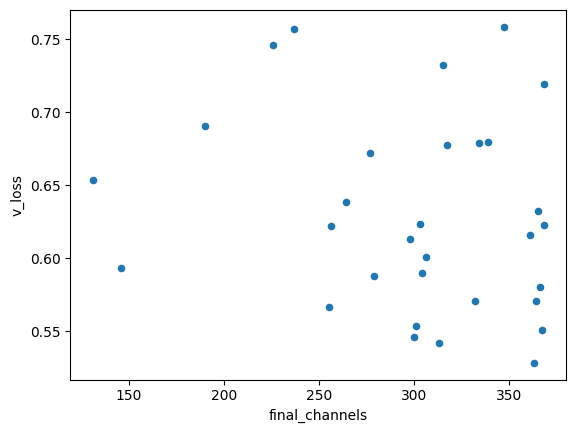

In [14]:
lower_loss.plot(x='final_channels', y='v_loss', kind='scatter')

<Axes: xlabel='starting_channels', ylabel='efficiency'>

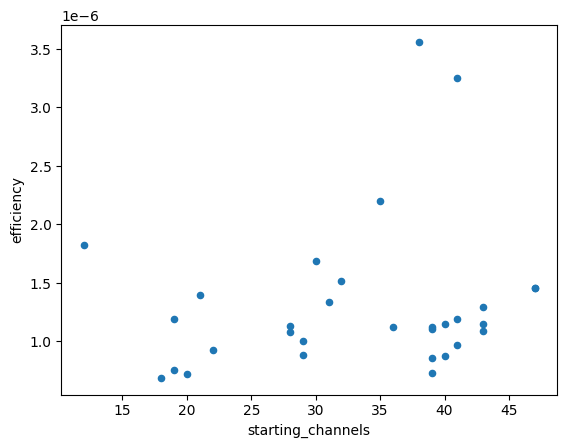

In [15]:
lower_loss.plot(x='starting_channels', y='efficiency', kind='scatter')

<Axes: xlabel='batch_size', ylabel='efficiency'>

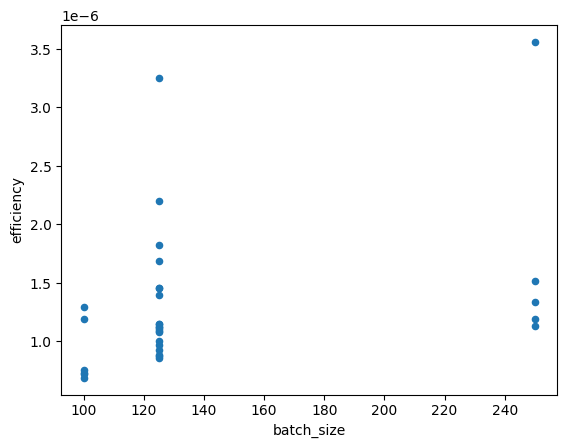

In [16]:
lower_loss.plot(x='batch_size', y='efficiency', kind='scatter')

<Axes: xlabel='cnn_layers', ylabel='efficiency'>

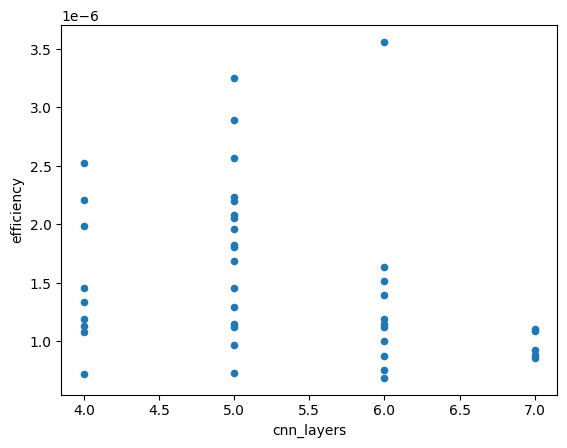

In [7]:
lower_loss.plot(x='cnn_layers', y='efficiency', kind='scatter')

<Axes: xlabel='fcn_layers', ylabel='efficiency'>

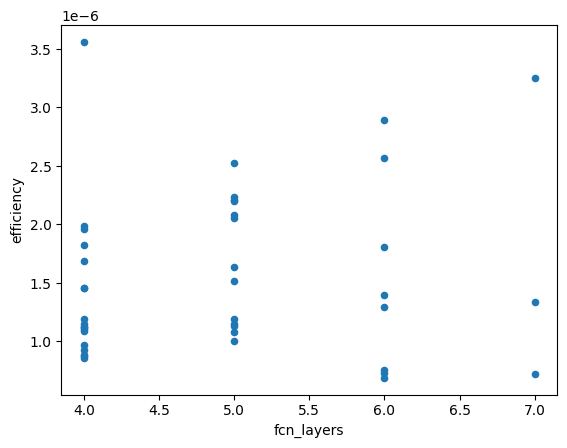

In [8]:
lower_loss.plot(x='fcn_layers', y='efficiency', kind='scatter')

<Axes: xlabel='cnn_layers', ylabel='v_loss'>

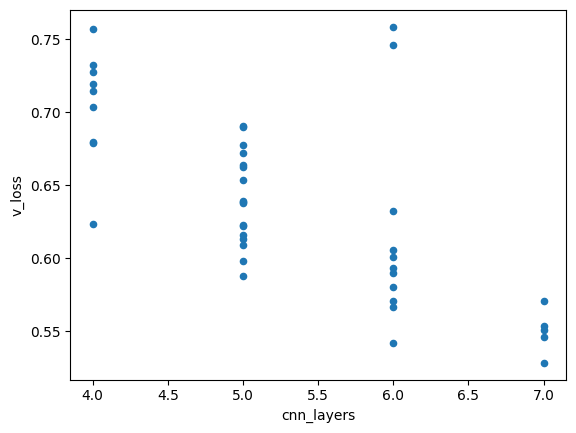

In [9]:
lower_loss.plot(x='cnn_layers', y='v_loss', kind='scatter')

<Axes: xlabel='fcn_layers', ylabel='v_loss'>

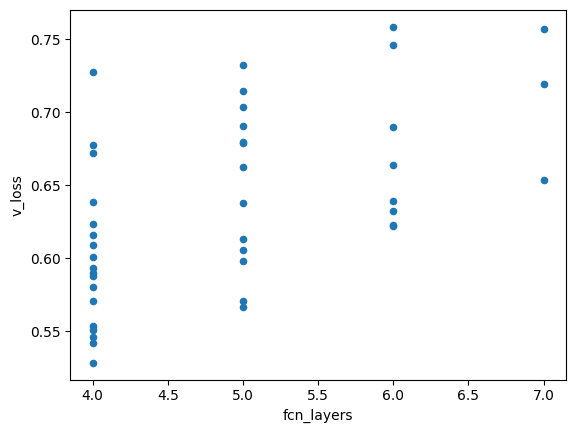

In [10]:
lower_loss.plot(x='fcn_layers', y='v_loss', kind='scatter')

In [2]:
latest_exp = lower_loss.checkpoint_path

NameError: name 'lower_loss' is not defined

In [11]:
latest_exp

3      C:\mywork\python\MachineVisionExperiments\chec...
4      C:\mywork\python\MachineVisionExperiments\chec...
12     C:\mywork\python\MachineVisionExperiments\chec...
13     C:\mywork\python\MachineVisionExperiments\chec...
14     C:\mywork\python\MachineVisionExperiments\chec...
                             ...                        
270    C:\mywork\python\MachineVisionExperiments\chec...
272    C:\mywork\python\MachineVisionExperiments\chec...
274    C:\mywork\python\MachineVisionExperiments\chec...
275    C:\mywork\python\MachineVisionExperiments\chec...
276    C:\mywork\python\MachineVisionExperiments\chec...
Name: checkpoint_path, Length: 139, dtype: object

WindowsPath('C:/mywork/python/MachineVisionExperiments/checkpoints/tune_classifier/3_20250407T202612_9156534410998571333_1/checkpoint_000013/model_checkpoint.pth')

In [1]:
latest_exp[latest_exp.map(lambda x : f'{x}').str.contains('4_2025')]

NameError: name 'latest_exp' is not defined

<Axes: xlabel='total_params', ylabel='v_loss'>

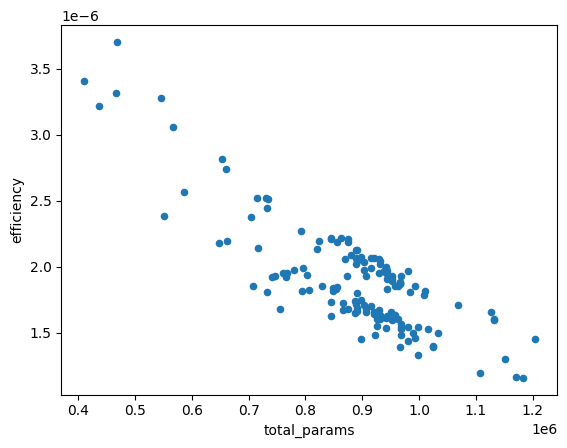

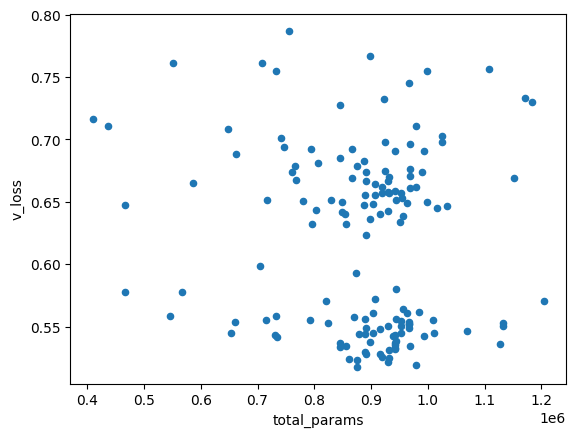

<Axes: xlabel='batch_size', ylabel='efficiency'>

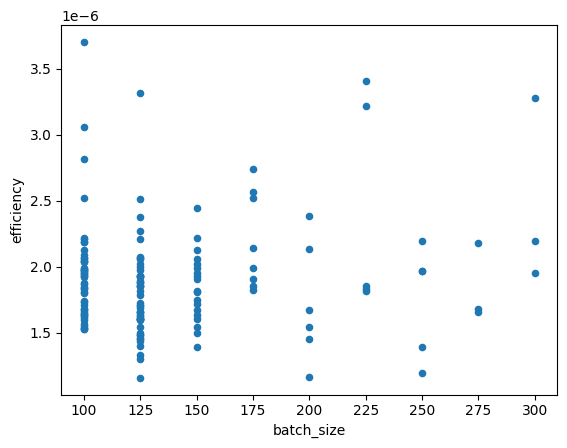

In [12]:
new_results.plot(x='batch_size',y='efficiency',logx=False, kind='scatter')

<Axes: xlabel='batch_size', ylabel='v_loss'>

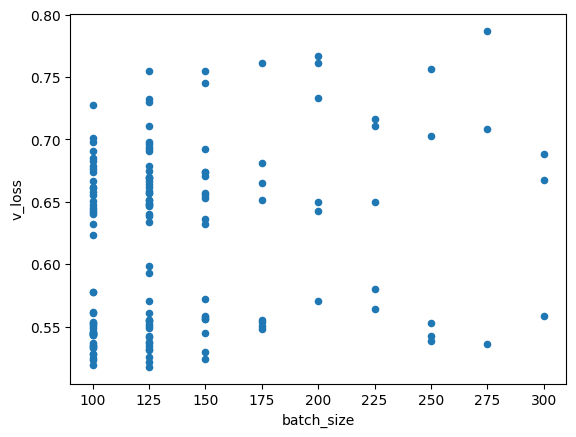

In [13]:
new_results.plot(x='batch_size',y='v_loss',logx=False, kind='scatter')

In [15]:
min_loss = new_results.v_loss.min()
best_result = new_results[new_results.v_loss == min_loss]
print(f'{best_result}')
checkpoint = best_result.checkpoint_path.iloc[0]



     batch_size  cnn_layers  fcn_layers  final_channels  learning_rate  \
161       125.0           6           4             210          0.001   

     starting_channels    v_loss  total_params  efficiency  \
161                 46  0.517787        875592    0.000002   

                                       checkpoint_path  
161  C:\mywork\python\MachineVisionExperiments\chec...  


In [20]:
from src.classifier.visualize_classifier_results import get_state_and_show_accuracy
acc_res = get_state_and_show_accuracy(checkpoint)

In [21]:
acc_res

{'plane': 100.0,
 'car': 0.0,
 'bird': 0.0,
 'cat': 0.0,
 'deer': 0.0,
 'dog': 0.0,
 'frog': 0.0,
 'horse': 0.0,
 'ship': 0.0,
 'truck': 0.0}